# Logistic Regression test of NBA stats 🏀

### Aim: Given a set of game data, predict whether the data belongs to (Jordan/Kobe/Lebron)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import sklearn.metrics
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

### Data preparation

In [8]:
raw = pd.read_csv('nba/allgames_stats.csv')
total = raw.loc[:, ['FG', 'FGA', 'FG%', '3P', '3PA', 'FT', 'FTA', 'TRB', 'AST', 'STL',
                    'BLK', 'PF', 'PTS', 'Player']]
total.loc[:, 'True'] = 0
# total.replace(to_replace=[None], value=0, inplace=True)
total.fillna(value=0, inplace=True)

# whom to predict
total.loc[:, 'True'].iloc[total['Player'] == 'Kobe Bryant'] = 1

# mj = total.loc[total['Player'] == 'Michael Jordan']
# kb = total.loc[total['Player'] == 'Kobe Bryant']
# lj = total.loc[total['Player'] == 'Lebron James']
# total = pd.concat([kb, mj[:500], lj[:500]])

In [3]:
total.info()
total.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4254 entries, 0 to 4253
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FG      4254 non-null   float64
 1   FGA     4254 non-null   float64
 2   FG%     4254 non-null   float64
 3   3P      4254 non-null   int64  
 4   3PA     4254 non-null   int64  
 5   FT      4254 non-null   float64
 6   FTA     4254 non-null   float64
 7   TRB     4254 non-null   int64  
 8   AST     4254 non-null   int64  
 9   STL     4254 non-null   float64
 10  BLK     4254 non-null   float64
 11  PF      4254 non-null   int64  
 12  PTS     4254 non-null   float64
 13  Player  4254 non-null   object 
 14  True    4254 non-null   int64  
dtypes: float64(8), int64(6), object(1)
memory usage: 498.6+ KB


,FG,FGA,FG%,3P,3PA,FT,FTA,TRB,AST,STL,BLK,PF,PTS,Player,True
0,0.0,1.0,0.00,0,0,0.0,0.0,1,0,0.0,1.0,1,0.0,Kobe Bryant,1
1,0.0,1.0,0.00,0,0,1.0,2.0,0,0,0.0,0.0,0,1.0,Kobe Bryant,1
2,2.0,3.0,0.67,1,2,0.0,0.0,0,0,0.0,0.0,0,5.0,Kobe Bryant,1
3,3.0,8.0,0.38,2,3,2.0,4.0,3,0,0.0,1.0,3,10.0,Kobe Bryant,1
4,0.0,3.0,0.00,0,0,2.0,2.0,3,1,0.0,0.0,0,2.0,Kobe Bryant,1


### Model training

In [28]:
X = total.loc[:, ['FG', 'FGA', 'FG%', '3P', '3PA', 'FT', 'FTA', 'TRB', 'AST', 'STL', 
                  'BLK', 'PF', 'PTS']]
Y = total.loc[:, 'True']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

logistic = sm.Logit(Y_train, X_train).fit()
logistic.summary()

Optimization terminated successfully.
         Current function value: 0.518275
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   True   No. Observations:                 3403
Model:                          Logit   Df Residuals:                     3390
Method:                           MLE   Df Model:                           12
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                  0.2110
Time:                        14:31:01   Log-Likelihood:                -1763.7
converged:                       True   LL-Null:                       -2235.3
Covariance Type:            nonrobust   LLR p-value:                2.874e-194
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
FG            -0.2891      0.043     -6.691      0.000      -0.374      -0.204
FGA            0.0976      0.013      7.726      0.000       0.073       0.122
FG%            3.2031      0.378      8.469      0.000       2.462       3.944
3P            -0.0228      0.056     -0.407      0.684      -0.133       0.087
3PA            0.2487      0.028      8.845      0.000       0.194       0.304
FT             0.2785      0.041      6.816      0.000       0.198       0.359
FTA           -0.2270      0.032     -7.202      0.000      -0.289      -0.165
TRB           -0.1594      0.016    -10.265      0.000      -0.190      -0.129
AST           -0.1508      0.016     -9.668      0.000      -0.181      -0.120
STL           -0.1834      0.032     -5.750      0.000      -0.246      -0.121
BLK           -0.2549      0.050     -5.065      0.000      -0.353      -0.156
PF             0.2553      0.030      8.488      0.000       0.196       0.314
PTS           -0.0170      0.019     -0.898      0.369      -0.054       0.020
==============================================================================
"""

### Test

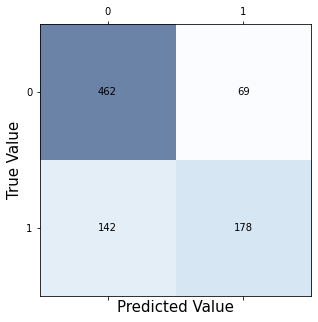

Accuracy: 0.7520564042303173


In [29]:
prob = logistic.predict(X_test)
pred = np.where(prob >= 0.5, 1, 0)

cm = sklearn.metrics.confusion_matrix(Y_test, pred, labels=[0, 1])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.6)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.xlabel('Predicted Value', fontsize=15)
plt.ylabel('True Value', fontsize=15)
plt.show()

accuracy = cm.diagonal().sum()/cm.sum()
print('Accuracy:', accuracy)

### Remove inputs of high P value: 3P, PTS

In [26]:
X = total.loc[:, ['FG', 'FGA', 'FG%', '3PA', 'FT', 'FTA', 'TRB', 'AST', 'STL', 
                  'BLK', 'PF']]
Y = total.loc[:, 'True']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

logistic = sm.Logit(Y_train, X_train).fit()
logistic.summary()

Optimization terminated successfully.
         Current function value: 0.518471
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   True   No. Observations:                 3403
Model:                          Logit   Df Residuals:                     3392
Method:                           MLE   Df Model:                           10
Date:                Fri, 29 Oct 2021   Pseudo R-squ.:                  0.2107
Time:                        14:30:50   Log-Likelihood:                -1764.4
converged:                       True   LL-Null:                       -2235.3
Covariance Type:            nonrobust   LLR p-value:                5.885e-196
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
FG            -0.3261      0.027    -12.195      0.000      -0.379      -0.274
FGA            0.0994      0.012      8.371      0.000       0.076       0.123
FG%            3.1836      0.377      8.444      0.000       2.445       3.923
3PA            0.2320      0.017     13.339      0.000       0.198       0.266
FT             0.2609      0.036      7.230      0.000       0.190       0.332
FTA           -0.2255      0.031     -7.169      0.000      -0.287      -0.164
TRB           -0.1591      0.016    -10.241      0.000      -0.190      -0.129
AST           -0.1501      0.016     -9.639      0.000      -0.181      -0.120
STL           -0.1839      0.032     -5.768      0.000      -0.246      -0.121
BLK           -0.2556      0.050     -5.082      0.000      -0.354      -0.157
PF             0.2563      0.030      8.532      0.000       0.197       0.315
==============================================================================
"""

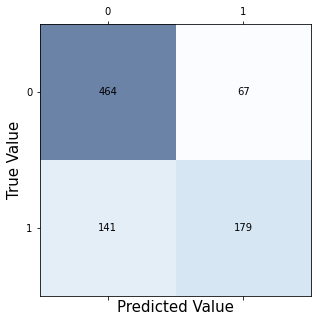

Accuracy: 0.7555816686251469


In [27]:
prob = logistic.predict(X_test)
pred = np.where(prob >= 0.5, 1, 0)

cm = sklearn.metrics.confusion_matrix(Y_test, pred, labels=[0, 1])

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.6)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i, s=cm[i, j], va='center', ha='center')

plt.xlabel('Predicted Value', fontsize=15)
plt.ylabel('True Value', fontsize=15)
plt.show()

accuracy = cm.diagonal().sum()/cm.sum()
print('Accuracy:', accuracy)